In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv("/content/1000025.txt")

In [4]:
df.shape

(698, 11)

In [5]:
df.head()

,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


In [6]:
col_names = ['Id', 'Clump_thickness', 'Uniformity_Cell_Size', 'Uniformity_Cell_Shape', 'Marginal_Adhesion',
             'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class']

df.columns = col_names

df.columns

Index(['Id', 'Clump_thickness', 'Uniformity_Cell_Size',
       'Uniformity_Cell_Shape', 'Marginal_Adhesion',
       'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin',
       'Normal_Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [7]:
df.head()

,Id,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


In [8]:
df.drop('Id', axis=1, inplace=True)

In [9]:
# view summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump_thickness              698 non-null    int64 
 1   Uniformity_Cell_Size         698 non-null    int64 
 2   Uniformity_Cell_Shape        698 non-null    int64 
 3   Marginal_Adhesion            698 non-null    int64 
 4   Single_Epithelial_Cell_Size  698 non-null    int64 
 5   Bare_Nuclei                  698 non-null    object
 6   Bland_Chromatin              698 non-null    int64 
 7   Normal_Nucleoli              698 non-null    int64 
 8   Mitoses                      698 non-null    int64 
 9   Class                        698 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


*The distribution of values shows that data type of Bare_Nuclei is of type integer. But the summary of the dataframe shows that it is type object. So, I will explicitly convert its data type to integer.*

In [10]:
df['Bare_Nuclei'] = pd.to_numeric(df['Bare_Nuclei'], errors='coerce')

In [11]:
df.dtypes

Clump_thickness                  int64
Uniformity_Cell_Size             int64
Uniformity_Cell_Shape            int64
Marginal_Adhesion                int64
Single_Epithelial_Cell_Size      int64
Bare_Nuclei                    float64
Bland_Chromatin                  int64
Normal_Nucleoli                  int64
Mitoses                          int64
Class                            int64
dtype: object

In [12]:
df.isnull().sum()


Clump_thickness                 0
Uniformity_Cell_Size            0
Uniformity_Cell_Shape           0
Marginal_Adhesion               0
Single_Epithelial_Cell_Size     0
Bare_Nuclei                    16
Bland_Chromatin                 0
Normal_Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

In [13]:
df['Class'].value_counts()

2    457
4    241
Name: Class, dtype: int64

In [14]:
df['Class'].value_counts()/np.float(len(df))

<ipython-input-14-97ba03cb8d30>:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df['Class'].value_counts()/np.float(len(df))


2    0.654728
4    0.345272
Name: Class, dtype: float64

outliers

In [15]:
print(round(df.describe(),2))

       Clump_thickness  Uniformity_Cell_Size  Uniformity_Cell_Shape  \
count           698.00                698.00                 698.00   
mean              4.42                  3.14                   3.21   
std               2.82                  3.05                   2.97   
min               1.00                  1.00                   1.00   
25%               2.00                  1.00                   1.00   
50%               4.00                  1.00                   1.00   
75%               6.00                  5.00                   5.00   
max              10.00                 10.00                  10.00   

       Marginal_Adhesion  Single_Epithelial_Cell_Size  Bare_Nuclei  \
count             698.00                       698.00       682.00   
mean                2.81                         3.22         3.55   
std                 2.86                         2.22         3.65   
min                 1.00                         1.00         1.00   
25%       

Visualization

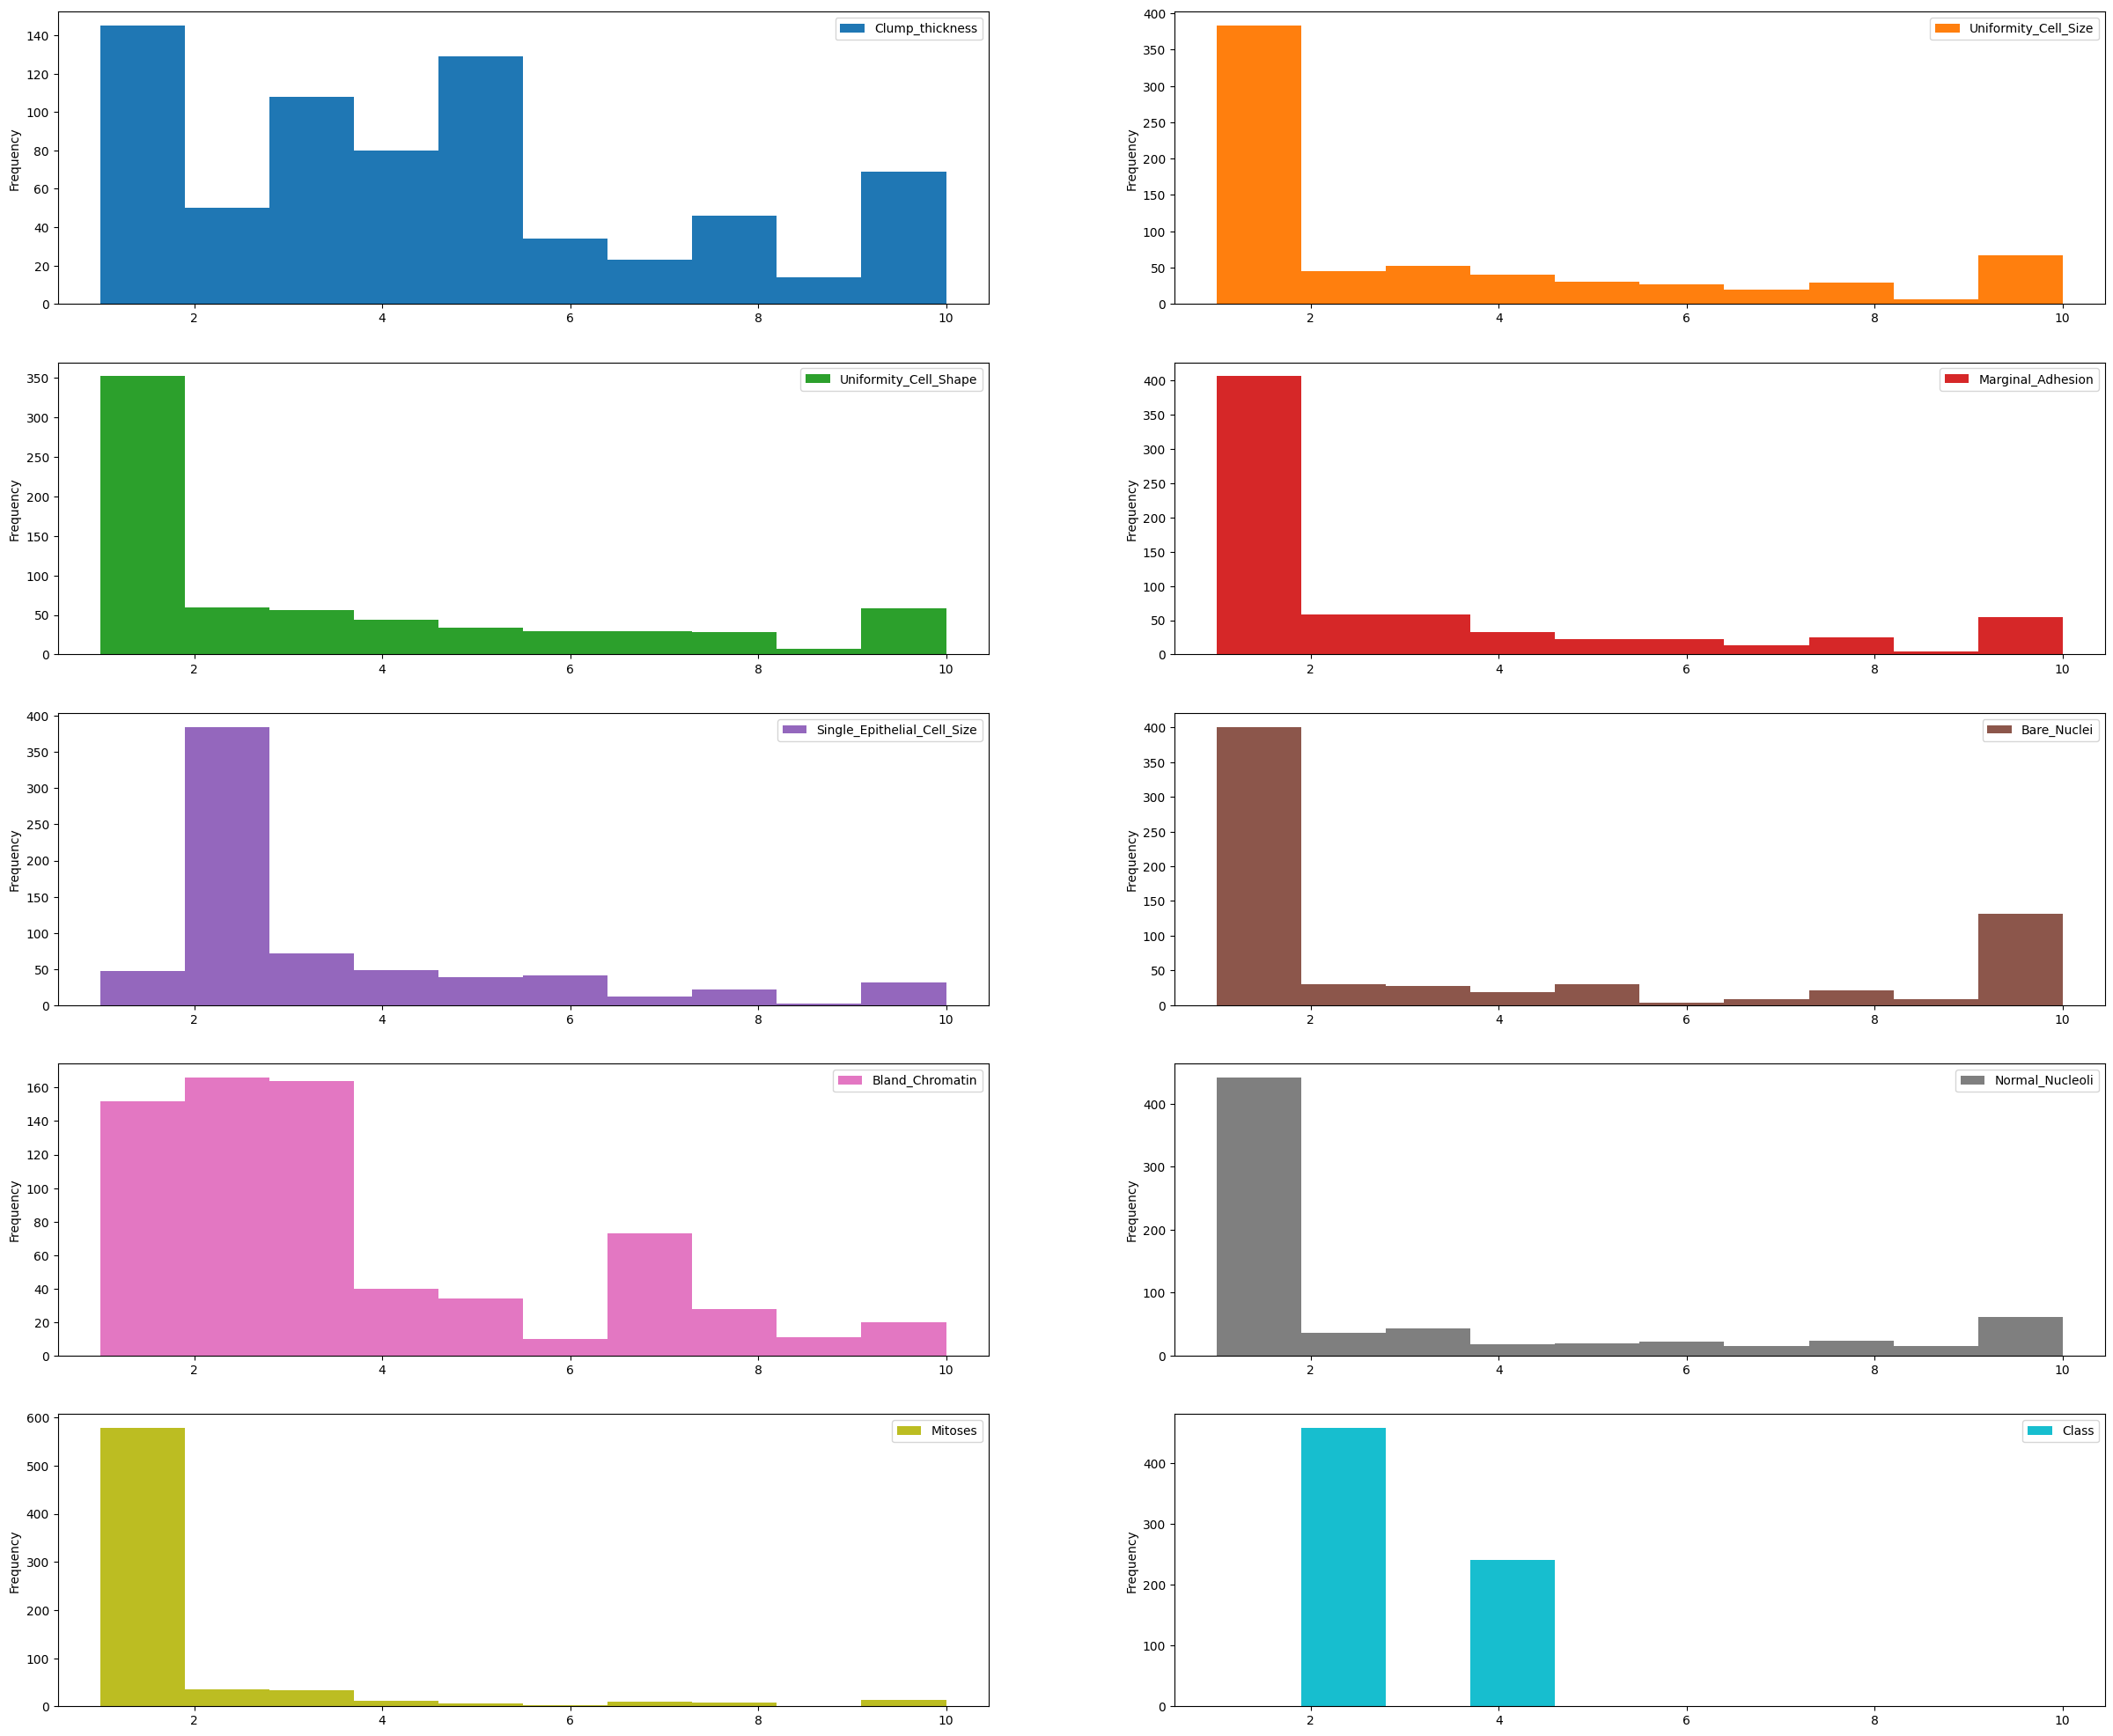

In [16]:
plt.rcParams['figure.figsize']=(30,25)

df.plot(kind='hist', bins=10, subplots=True, layout=(5,2), sharex=False, sharey=False)

plt.show()

In [18]:
correlation = df.corr()

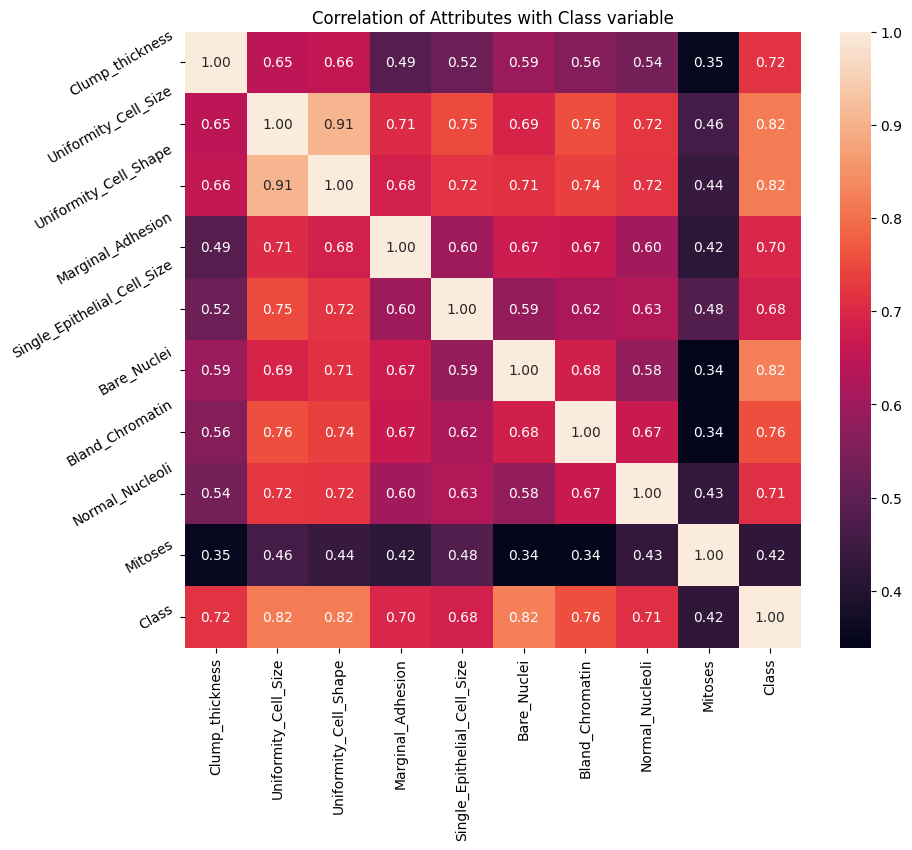

In [19]:
plt.figure(figsize=(10,8))
plt.title('Correlation of Attributes with Class variable')
a = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)
plt.show()

In [20]:
X = df.drop(['Class'], axis=1)

y = df['Class']

In [21]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [22]:
X_train.shape, X_test.shape

((558, 9), (140, 9))

In [23]:
# impute missing values in X_train and X_test with respective column median in X_train

for df1 in [X_train, X_test]:
    for col in X_train.columns:
        col_median=X_train[col].median()
        df1[col].fillna(col_median, inplace=True)

In [24]:
X_train.isnull().sum()

Clump_thickness                0
Uniformity_Cell_Size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
dtype: int64

In [25]:
X_test.isnull().sum()

Clump_thickness                0
Uniformity_Cell_Size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
dtype: int64

feature scaling

In [26]:
cols = X_train.columns

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [28]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [29]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [30]:
X_train.head()

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
0,0.574621,-0.040143,0.277515,-0.629622,0.775913,-0.384119,-0.171342,1.983330,-0.333601
1,-0.497748,-0.680143,-0.721540,-0.629622,-0.549473,-0.661042,-0.171342,-0.601658,-0.333601
2,0.932077,1.879857,0.277515,2.541854,2.984890,-0.107196,0.660039,0.044589,0.859663
3,0.932077,0.599857,0.943552,0.075150,-0.107678,1.277420,1.491419,0.367712,-0.333601
4,-0.855205,-0.680143,-0.721540,-0.629622,-0.549473,-0.661042,-1.002722,-0.601658,-0.333601


In [31]:
# import KNeighbors ClaSSifier from sklearn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [32]:
y_pred = knn.predict(X_test)

y_pred

array([4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 4,
       4, 4, 2, 4, 4, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4,
       4, 4, 2, 4, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 2, 4,
       4, 2, 4, 4, 2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 4, 2, 2, 2, 2, 2, 4, 2,
       2, 4, 4, 4, 2, 4, 2, 4, 2, 2, 2, 2, 4, 4, 4, 4, 2, 2, 4, 2, 2, 2,
       2, 4, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 4, 4, 4, 2, 2, 4, 2, 2, 4, 4,
       2, 4, 2, 2, 2, 2, 4, 4])

In [33]:
# probability of getting output as 2 - benign cancer

knn.predict_proba(X_test)[:,0]

array([0.        , 1.        , 0.        , 0.33333333, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 0.66666667, 1.        ,
       0.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.        , 0.        ,
       0.        , 1.        , 0.        , 1.        , 0.        ,
       1.        , 1.        , 1.        , 0.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.        ,
       0.        , 0.33333333, 0.        , 0.        , 1.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       1.        , 1.        , 0.        , 1.        , 1.     

In [34]:
# probability of getting output as 4 - malignant cancer

knn.predict_proba(X_test)[:,1]

array([1.        , 0.        , 1.        , 0.66666667, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 1.        , 1.        ,
       0.        , 1.        , 1.        , 1.        , 0.        ,
       1.        , 1.        , 1.        , 0.33333333, 0.        ,
       1.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 1.        , 1.        ,
       1.        , 0.        , 1.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       1.        , 0.66666667, 1.        , 1.        , 0.        ,
       1.        , 1.        , 0.        , 1.        , 1.        ,
       0.        , 0.        , 1.        , 0.        , 0.     

In [35]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.9714


Compare the train-set and test-set accuracy

In [36]:
y_pred_train = knn.predict(X_train)

In [37]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9803


Check for overfitting and underfitting

In [38]:
print('Training set score: {:.4f}'.format(knn.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(knn.score(X_test, y_test)))

Training set score: 0.9803
Test set score: 0.9714


**Rebuild kNN Classification model using different values of k**

In [40]:
knn_5 = KNeighborsClassifier(n_neighbors=5)

knn_5.fit(X_train, y_train)

y_pred_5 = knn_5.predict(X_test)

print('Model accuracy score with k=5 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_5)))

Model accuracy score with k=5 : 0.9714


In [41]:
knn_6 = KNeighborsClassifier(n_neighbors=6)

knn_6.fit(X_train, y_train)

y_pred_6 = knn_6.predict(X_test)

print('Model accuracy score with k=6 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_6)))

Model accuracy score with k=6 : 0.9643


In [42]:
knn_7 = KNeighborsClassifier(n_neighbors=7)

knn_7.fit(X_train, y_train)

y_pred_7 = knn_7.predict(X_test)

print('Model accuracy score with k=7 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_7)))

Model accuracy score with k=7 : 0.9571


*Now, based on the above analysis we can conclude that our classification model accuracy is very good. Our model is doing a very good job in terms of predicting the class labels.*

*But, it does not give the underlying distribution of values. Also, it does not tell anything about the type of errors our classifer is making.*

*We have another tool called Confusion matrix that comes to our rescue.*

In [43]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[83  2]
 [ 2 53]]

True Positives(TP) =  83

True Negatives(TN) =  53

False Positives(FP) =  2

False Negatives(FN) =  2


In [44]:
cm_7 = confusion_matrix(y_test, y_pred_7)

print('Confusion matrix\n\n', cm_7)

print('\nTrue Positives(TP) = ', cm_7[0,0])

print('\nTrue Negatives(TN) = ', cm_7[1,1])

print('\nFalse Positives(FP) = ', cm_7[0,1])

print('\nFalse Negatives(FN) = ', cm_7[1,0])

Confusion matrix

 [[82  3]
 [ 3 52]]

True Positives(TP) =  82

True Negatives(TN) =  52

False Positives(FP) =  3

False Negatives(FN) =  3


<Axes: >

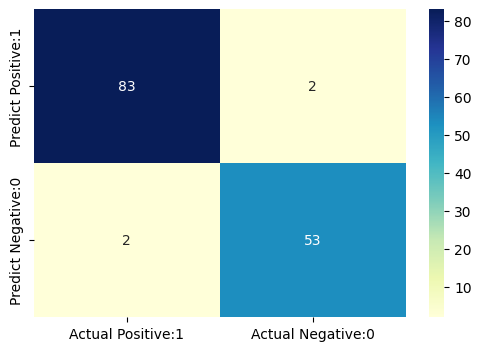

In [46]:
plt.figure(figsize=(6,4))

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [47]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           2       0.98      0.98      0.98        85
           4       0.96      0.96      0.96        55

    accuracy                           0.97       140
   macro avg       0.97      0.97      0.97       140
weighted avg       0.97      0.97      0.97       140



In [48]:
from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.9701


In [49]:
from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(knn, X_train, y_train, cv=5, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.9784


Our Cross Validated ROC AUC is very close to 1. So, we can conclude that, the KNN classifier is indeed a very good model.